# Check data iterator with data augmentation

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import sys
sys.path.append('../common')

In [4]:
from data_utils import type_1_ids, type_2_ids, type_3_ids, test_ids
# from training_utils import get_trainval_id_type_lists
# from test_utils import get_test_id_type_list
# from metrics import logloss_mc

In [5]:
# from training_utils import data_augmentation, data_iterator
# train_id_type_list, _ = get_trainval_id_type_lists()

# image_size = (224, 224)
# batch_size = 5
# train_iter = data_iterator(train_id_type_list, 
#                            batch_size=batch_size, 
#                            image_size=image_size, 
#                            data_augmentation_fn=lambda X, Y: data_augmentation(X, Y),
#                            verbose=1, 
#                            test_mode=False)

((5, 3, 224, 224), dtype('float32'), (5, 3))


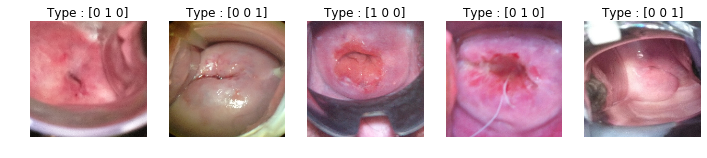

In [53]:
# for X, Y in train_iter:
#     print(X.shape, X.dtype, Y.shape)
#     n = 5
#     for counter in range(batch_size):
#         if counter % n == 0:
#             plt.figure(figsize=(12, 4))
#         plt.subplot(1, n, counter % n + 1)
#         plt.imshow(X[counter, :, :, :].transpose([1, 2, 0]))
#         plt.title("Type : {}".format(Y[counter,:]))
#         plt.axis('off')
    
#     break

In [ ]:
# train_id_type_list, _ = get_trainval_id_type_lists()

# image_size = (224, 224)
# batch_size = 5
# train_iter = data_iterator(train_id_type_list, 
#                            batch_size=batch_size, 
#                            image_size=image_size, 
#                            data_augmentation_fn=lambda X, Y: data_augmentation(X, Y),
#                            verbose=1, 
#                            test_mode=True)

('Image id/type:', '1011', 'Type_2', '| counter=', 0)
('Image id/type:', '1028', 'Type_3', '| counter=', 1)
('Image id/type:', '1027', 'Type_1', '| counter=', 2)
('Image id/type:', '1012', 'Type_2', '| counter=', 3)
('Image id/type:', '1029', 'Type_3', '| counter=', 4)
((5, 3, 224, 224), dtype('float32'), (5, 3))


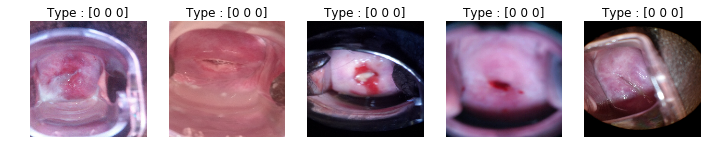

In [60]:
# for X, Y, _ in train_iter:
#     print(X.shape, X.dtype, Y.shape)
#     n = 5
#     for counter in range(batch_size):
#         if counter % n == 0:
#             plt.figure(figsize=(12, 4))
#         plt.subplot(1, n, counter % n + 1)
#         plt.imshow(X[counter, :, :, :].transpose([1, 2, 0]))
#         plt.title("Type : {}".format(Y[counter,:]))
#         plt.axis('off')
    
#     break

## KerasContrib - ImageMaskGenerator

Whole image and Cervix/Os mask

In [6]:
import os
import numpy as np
np.random.seed(2017)

from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations
from training_utils import get_trainval_id_type_lists2
sloth_annotations_filename = os.path.join(RESOURCES_PATH, 'cervix_os.json')
annotations = get_annotations(sloth_annotations_filename)

train_id_type_list, val_id_type_list = get_trainval_id_type_lists2(annotations=annotations, val_split=0.25)

print "Total : %s, Train : %s, Val : %s" % (len(annotations), len(train_id_type_list), len(val_id_type_list))

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.
Total : 639, Train : 479, Val : 160


In [6]:
from preprocessing.image.generators import ImageMaskGenerator
from training_utils import random_rgb_to_green

In [9]:
train_gen = ImageMaskGenerator(pipeline=('random_transform', random_rgb_to_green, 'standardize'),
                               featurewise_center=True, featurewise_std_normalization=True,
                               rotation_range=90., 
                               width_shift_range=0.15, height_shift_range=0.15,
                               shear_range=3.14/6.0,
                               zoom_range=0.25,
                               channel_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True)

# train_gen = ImageMaskGenerator(pipeline=(random_rgb_to_green,))

In [17]:
from xy_providers import cached_image_mask_provider as xy_provider
from xy_providers import DataCache

In [41]:
train_gen.fit(xy_provider(train_id_type_list,    
                          test_mode=True,
                          image_size=image_size,
                          verbose=1), 
              len(train_id_type_list), 
              augment=True, 
              save_to_dir=GENERATED_DATA,
              save_prefix='os_cervix',
              batch_size=4,
              verbose=1)

Initialize cache : 479
('Image id/type:', u'816', u'Type_2', '| counter=', 0)
-- Load from disk
  0/479 [..............................] - ETA: 0s('Image id/type:', u'538', u'Type_2', '| counter=', 1)
-- Load from disk
('Image id/type:', u'1036', u'Type_2', '| counter=', 2)
-- Load from disk
('Image id/type:', u'377', u'Type_2', '| counter=', 3)
-- Load from disk
('Image id/type:', u'771', u'Type_2', '| counter=', 4)
-- Load from disk
('Image id/type:', u'314', u'Type_2', '| counter=', 5)
-- Load from disk
('Image id/type:', u'610', u'Type_2', '| counter=', 6)
-- Load from disk
('Image id/type:', u'412', u'Type_2', '| counter=', 7)
-- Load from disk
  4/479 [..............................] - ETA: 183s('Image id/type:', u'595', u'Type_2', '| counter=', 8)
-- Load from disk
('Image id/type:', u'616', u'Type_2', '| counter=', 9)
-- Load from disk
('Image id/type:', u'139', u'Type_1', '| counter=', 10)
-- Load from disk
('Image id/type:', u'457', u'Type_2', '| counter=', 11)
-- Load from d

In [43]:
batch_size = 4
print("len(train_id_type_list)=", len(train_id_type_list))
flow = train_gen.flow(xy_provider(train_id_type_list, 
                                  cache=cache, 
                                  verbose=1), 
                      # Ensure that all batches have the same size
                      (len(train_id_type_list) // batch_size) * batch_size, 
                      batch_size=batch_size)

('len(train_id_type_list)=', 479)
Initialize cache : 479
('Image id/type:', u'816', u'Type_2', '| counter=', 0)
-- Load from disk


Check on 2 epochs 

In [44]:
loop_max_counter = (2050 // batch_size) * batch_size
for x, y in flow:
    print loop_max_counter, x.shape, y.shape   
    print x.mean(), x.std()
    assert x.shape[0] == batch_size
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break

('Image id/type:', u'538', u'Type_2', '| counter=', 1)
-- Load from disk
('Image id/type:', u'1036', u'Type_2', '| counter=', 2)
-- Load from disk
('Image id/type:', u'377', u'Type_2', '| counter=', 3)
-- Load from disk
2048 (4, 3, 224, 224) (4, 2, 224, 224)
0.232545 0.272918
('Image id/type:', u'771', u'Type_2', '| counter=', 4)
-- Load from disk
('Image id/type:', u'314', u'Type_2', '| counter=', 5)
-- Load from disk
('Image id/type:', u'610', u'Type_2', '| counter=', 6)
-- Load from disk
('Image id/type:', u'412', u'Type_2', '| counter=', 7)
-- Load from disk
2047 (4, 3, 224, 224) (4, 2, 224, 224)
0.336328 0.326946
('Image id/type:', u'595', u'Type_2', '| counter=', 8)
-- Load from disk
('Image id/type:', u'616', u'Type_2', '| counter=', 9)
-- Load from disk
('Image id/type:', u'139', u'Type_1', '| counter=', 10)
-- Load from disk
('Image id/type:', u'457', u'Type_2', '| counter=', 11)
-- Load from disk
2046 (4, 3, 224, 224) (4, 2, 224, 224)
0.373502 0.343064
('Image id/type:', u'35

KeyboardInterrupt: 

In [75]:
def normalize(in_img, q_min=0.5, q_max=99.5, return_mins_maxs=False):
    """
    Normalize image in [0.0, 1.0]
    mins is array of minima
    maxs is array of differences between maxima and minima
    """
    init_shape = in_img.shape
    if len(init_shape) == 2:
        in_img = np.expand_dims(in_img, axis=2)
    w, h, d = in_img.shape
    img = in_img.copy()
    img = np.reshape(img, [w * h, d]).astype(np.float64)
    mins = np.percentile(img, q_min, axis=0)
    maxs = np.percentile(img, q_max, axis=0) - mins
    maxs[(maxs < 0.0001) & (maxs > -0.0001)] = 0.0001
    img = (img - mins[None, :]) / maxs[None, :]
    img = img.clip(0.0, 1.0)
    img = np.reshape(img, [w, h, d])
    if init_shape != img.shape:
        img = img.reshape(init_shape)
    if return_mins_maxs:
        return img, mins, maxs
    return img

def scale_percentile(matrix, q_min=0.5, q_max=99.5):
    is_gray = False
    if len(matrix.shape) == 2:
        is_gray = True
        matrix = matrix.reshape(matrix.shape + (1,))
    matrix = (255*normalize(matrix, q_min, q_max)).astype(np.uint8)
    if is_gray:
        matrix = matrix.reshape(matrix.shape[:2])
    return matrix  

(4, 3, 224, 224) (4, 2, 224, 224)
0.286971 0.279376
(4, 3, 224, 224) (4, 2, 224, 224)
0.236758 0.280845


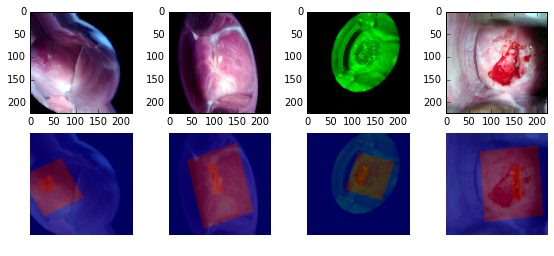

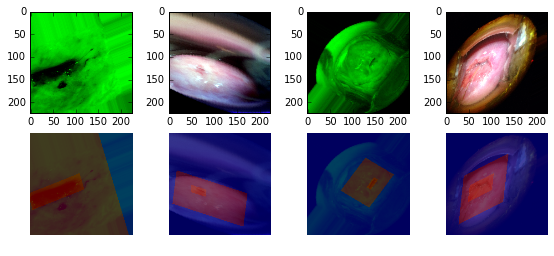

In [34]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 5
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(2, n, counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.subplot(2, n, n + counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.imshow(y[counter, 0, :, :], alpha=0.5)
        plt.imshow(y[counter, 1, :, :], alpha=0.5)    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [ ]:
def get_test_id_type_list2(annotations):
    
    trainval_filepaths = []
    return [(image_id, 'Test') for image_id in test_ids]


In [40]:
trainval_id_type_list = []
for annotation in annotations:
    image_name = annotation['filename']
    image_id = os.path.basename(image_name)[:-4]
    image_type = os.path.split(os.path.dirname(image_name))[1]
    trainval_id_type_list.append((image_id, image_type))

test_id_type_list = [(image_id, 'Test') for image_id in test_ids]
type_ids=(type_1_ids, type_2_ids, type_3_ids)
image_types = ["Type_1", "Type_2", "Type_3"]

for image_ids, image_type in zip(type_ids, image_types):    
    for image_id in image_ids:
        if (image_id, image_type) not in trainval_id_type_list:
            test_id_type_list.append((image_id, image_type))
            

[('277', 'Test'),
 ('68', 'Test'),
 ('115', 'Test'),
 ('450', 'Test'),
 ('356', 'Test'),
 ('406', 'Test'),
 ('199', 'Test'),
 ('88', 'Test'),
 ('251', 'Test'),
 ('123', 'Test'),
 ('223', 'Test'),
 ('92', 'Test'),
 ('335', 'Test'),
 ('224', 'Test'),
 ('261', 'Test'),
 ('415', 'Test'),
 ('369', 'Test'),
 ('47', 'Test'),
 ('511', 'Test'),
 ('151', 'Test'),
 ('408', 'Test'),
 ('484', 'Test'),
 ('288', 'Test'),
 ('496', 'Test'),
 ('121', 'Test'),
 ('49', 'Test'),
 ('338', 'Test'),
 ('382', 'Test'),
 ('39', 'Test'),
 ('375', 'Test'),
 ('183', 'Test'),
 ('502', 'Test'),
 ('376', 'Test'),
 ('330', 'Test'),
 ('116', 'Test'),
 ('424', 'Test'),
 ('347', 'Test'),
 ('349', 'Test'),
 ('208', 'Test'),
 ('170', 'Test'),
 ('143', 'Test'),
 ('463', 'Test'),
 ('259', 'Test'),
 ('100', 'Test'),
 ('119', 'Test'),
 ('162', 'Test'),
 ('7', 'Test'),
 ('500', 'Test'),
 ('214', 'Test'),
 ('319', 'Test'),
 ('14', 'Test'),
 ('293', 'Test'),
 ('129', 'Test'),
 ('398', 'Test'),
 ('187', 'Test'),
 ('176', 'Test'),
 

In [41]:
len(test_id_type_list)

1785

## KerasContrib - ImageDataGenerator

Cervix/Os images and labels

In [7]:
import os
import numpy as np

seed = 2017
np.random.seed(seed)

from training_utils import get_trainval_id_type_lists
from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations

from preprocessing.image.generators import ImageDataGenerator
from xy_providers import cached_image_label_provider as xy_provider, DataCache

In [8]:
train_id_type_list, val_id_type_list = get_trainval_id_type_lists()
cervix_train_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in train_id_type_list if id_type[0] != '1339']
cervix_val_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in val_id_type_list if id_type[0] != '1339']

os_train_id_type_list = [(id_type[0], id_type[1] + '_os') for id_type in train_id_type_list if id_type[0] != '1339']
os_val_id_type_list = [(id_type[0], id_type[1] + '_os') for id_type in val_id_type_list if id_type[0] != '1339']

len(cervix_train_id_type_list), len(cervix_val_id_type_list), len(os_train_id_type_list), len(os_val_id_type_list)

Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


(1635, 702, 1635, 702)

In [9]:
from training_utils import random_rgb_to_green

### Cervix images

In [38]:
normalize_data = True

In [39]:
train_gen = ImageDataGenerator(pipeline=('random_transform', random_rgb_to_green, 'standardize'),
                               featurewise_center=normalize_data,
                               featurewise_std_normalization=normalize_data,
                               rotation_range=45.,
#                                width_shift_range=0.15, height_shift_range=0.15,
#                                shear_range=3.14/6.0,
#                                zoom_range=0.25,
#                                channel_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='constant')
val_gen = ImageDataGenerator(rotation_range=90.,
                             featurewise_center=normalize_data,
                             featurewise_std_normalization=normalize_data,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='constant')

In [40]:
if False:
    train_gen.fit(xy_provider(cervix_train_id_type_list,    
                              test_mode=True,
                              verbose=1), 
                  len(cervix_train_id_type_list), 
                  augment=True, 
                  save_to_dir=GENERATED_DATA,
                  save_prefix='check_cervix',
                  batch_size=4,
                  seed=seed,
                  verbose=0)
else:
    # Preprocessing of Xception: keras/applications/xception.py
    train_gen.mean = 0.5
    train_gen.std = 0.5

val_gen.mean = train_gen.mean
val_gen.std = train_gen.std

In [41]:
cache = DataCache(0)

In [42]:
batch_size = 4
print("len(cervix_train_id_type_list)=", len(cervix_train_id_type_list))
flow = train_gen.flow(xy_provider(cervix_train_id_type_list, 
                                  image_size=(299, 299),
                                  cache=cache, 
                                  verbose=0), 
                      # Ensure that all batches have the same size
                      (len(cervix_train_id_type_list) // batch_size) * batch_size, 
                      seed=seed,
                      batch_size=batch_size)

('len(cervix_train_id_type_list)=', 1635)


In [49]:
import cv2

(4, 3, 299, 299) (4, 3)
-0.0256844 0.59962
(4, 3, 299, 299) (4, 3)
-0.13276 0.612146


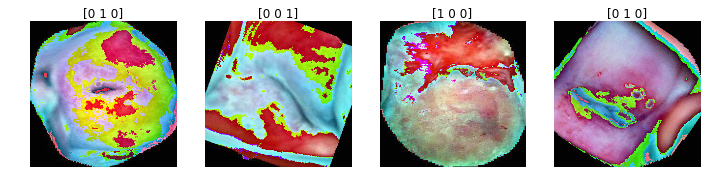

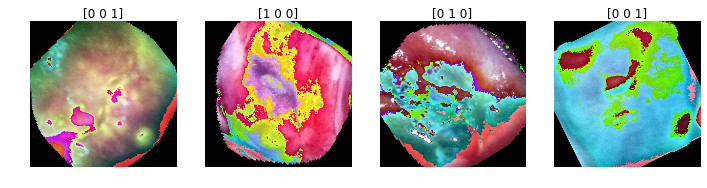

In [51]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 4
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        #plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        img = x[counter, :, :, :].transpose([1, 2, 0])
#         hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#         plt.hist(hsv[:,:,0], label='Hue')
#         plt.hist(hsv[:,:,1], label='Saturation')
#         plt.hist(hsv[:,:,2], label='Value')
#         plt.legend()
        plt.imshow(img)
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [39]:
batch_size = 4
print("len(cervix_val_id_type_list)=", len(cervix_val_id_type_list))
flow = val_gen.flow(xy_provider(cervix_val_id_type_list, 
                                cache=cache, 
                                verbose=0), 
                    # Ensure that all batches have the same size
                    (len(cervix_val_id_type_list) // batch_size) * batch_size, 
                    seed=seed,
                    batch_size=batch_size)

('len(cervix_val_id_type_list)=', 702)


(4, 3, 299, 299) (4, 3)
0.382903 0.887032
(4, 3, 299, 299) (4, 3)
-0.0176076 0.831985


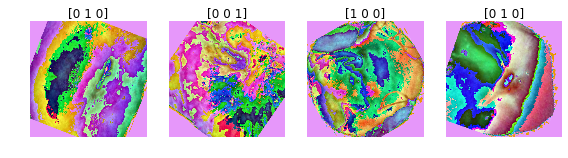

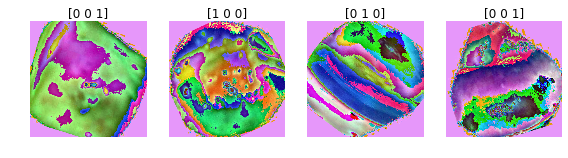

In [41]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 4
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        #plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.imshow(x[counter, :, :, :].transpose([1, 2, 0]))
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

### Os images

In [36]:
train_gen = ImageDataGenerator(pipeline=('random_transform', random_rgb_to_green, 'standardize'),
                               featurewise_center=True,
                               featurewise_std_normalization=True,
                               rotation_range=90.,
                               width_shift_range=0.15, height_shift_range=0.15,
                               shear_range=3.14/6.0,
                               zoom_range=0.25,
                               channel_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='constant')

val_gen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=90.,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='constant')

In [37]:
train_gen.fit(xy_provider(os_train_id_type_list,    
                          test_mode=True,
                          verbose=0), 
              len(os_train_id_type_list), 
              augment=True, 
              save_to_dir=GENERATED_DATA,
              save_prefix='check_os',
              batch_size=4,
              seed=seed,
              verbose=1)

val_gen.mean = train_gen.mean
val_gen.std = train_gen.std

1635/1635 [==============================] - 30s    


In [38]:
cache = DataCache(0)

In [39]:
batch_size = 4
print("len(os_train_id_type_list)=", len(os_train_id_type_list))
flow = train_gen.flow(xy_provider(os_train_id_type_list, 
                                  cache=cache, 
                                  verbose=0), 
                      # Ensure that all batches have the same size
                      (len(os_train_id_type_list) // batch_size) * batch_size, 
                      seed=seed,
                      batch_size=batch_size)

('len(os_train_id_type_list)=', 1635)


(4, 3, 224, 224) (4, 3)
0.576923 1.04741
(4, 3, 224, 224) (4, 3)
-0.0388725 1.04362


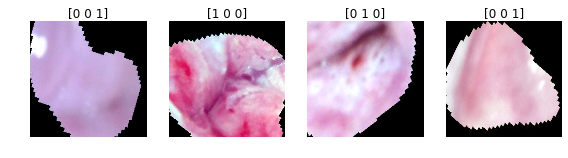

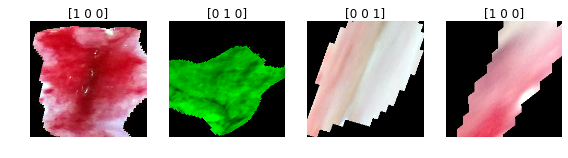

In [50]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 4
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

In [51]:
batch_size = 4
print("len(os_val_id_type_list)=", len(os_val_id_type_list))
flow = val_gen.flow(xy_provider(os_val_id_type_list, 
                                cache=cache, 
                                verbose=0), 
                    # Ensure that all batches have the same size
                    (len(os_val_id_type_list) // batch_size) * batch_size, 
                    seed=seed,
                    batch_size=batch_size)

('len(os_val_id_type_list)=', 702)


(4, 3, 224, 224) (4, 3)
0.0178506 0.793489
(4, 3, 224, 224) (4, 3)
0.322669 1.06603


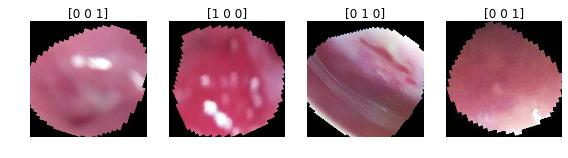

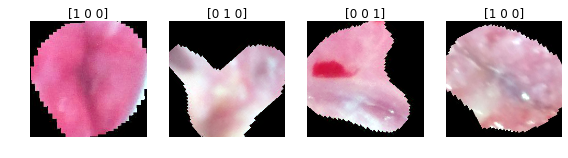

In [53]:
loop_max_counter = 2
for x, y in flow:
    print x.shape, y.shape   
    print x.mean(), x.std()
    n = 4
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
        plt.title("{}".format(y[counter]))    
        plt.axis('off')
    
    loop_max_counter -= 1
    if loop_max_counter == 0:
        break
    

Normalize color space

In [10]:
gen = xy_provider(cervix_train_id_type_list, 
                    image_size=(299, 299),
                    cache=None, 
                    verbose=0)

In [11]:
import cv2

In [115]:
from image_utils import spot_cleaning, median_blur

-- 0
-- 1
-- 2
-- 3


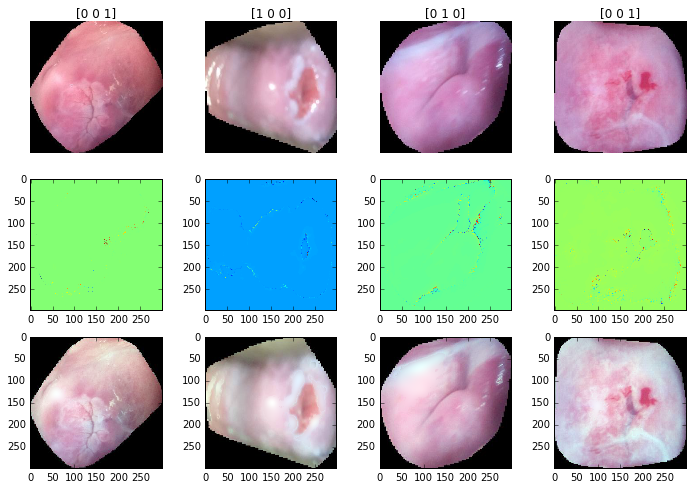

In [134]:
counter = 0
n = 4
for x, y in gen:
    print "--", counter
    if counter % n == 0:
        plt.figure(figsize=(12, 8))
    plt.subplot(3, n, 0*n + counter % n + 1)
    #plt.imshow(scale_percentile(x[counter, :, :, :].transpose([1, 2, 0])))
    img = x.transpose((2, 1, 0))
    plt.imshow(img)
    plt.title("{}".format(y))    
    plt.axis('off')

#     proc = median_blur(img, 17)
#     img2 = spot_cleaning(img, 17, 0.55)

    g = np.mean(img, axis=2)
    mask = (g > 0).astype(np.uint8)
    ret = cv2.mean(img, mask)
    ret = ret[:-1]
    img2 = img.copy()
    mask = g > 0.80
    
    proc = cv2.GaussianBlur(img2, (51, 51), 0)
    
    img2[mask] = proc[mask]
    for i in range(img2.shape[2]):             
        img2[:,:,i] -= ret[i]
        
    plt.subplot(3, n, 1*n + counter % n + 1)
    
#     hsv = cv2.cvtColor((255.0*img2).astype(np.uint8), cv2.COLOR_RGB2HSV)
#     h = hsv[:,:,0].astype(np.float)
#     s = hsv[:,:,1].astype(np.float)
#     v = hsv[:,:,2].astype(np.float)
#    g = cv2.cvtColor((255.0*img2).astype(np.uint8), cv2.COLOR_RGB2GRAY)
#     proc = s + v# + h
#     proc *= 255.0 / proc.max()
    
    ind = (img2[:,:,0] - img2[:,:,1]) / (img2[:,:,0] + img2[:,:,1] + 1e-10)
    
    plt.imshow(scale_percentile(ind, q_min=0.01, q_max=99.99))
    
#     h = cv2.equalizeHist(proc.astype(np.uint8))
#     g = cv2.equalizeHist(g) 

    plt.subplot(3, n, 2*n + counter % n + 1)
    
#     plt.imshow(img2)
    plt.imshow(scale_percentile(img2, q_min=0.01, q_max=99.99))


#     plt.hist(hsv[:,:,0], bins=50, label='Hue')
# #     plt.hist(hsv[:,:,1], label='Saturation')
# #     plt.hist(hsv[:,:,2], label='Value')
#     plt.legend()
    counter += 1
    if counter == 4:
        break